In [29]:
import fastai

from fastai import (
    untar_data, 
    URLs,
    accuracy
)

from fastai.vision import (
    ImageDataBunch, 
    get_transforms, 
    imagenet_stats, 
    create_cnn,
    models
)

In [9]:
path = untar_data(URLs.DOGS)
path

PosixPath('/home/jupyter/.fastai/data/dogscats')

In [17]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

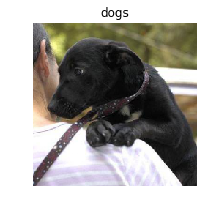

In [22]:
img, label = data.valid_ds[-1]
img.show(title=data.classes[label])

In [30]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/jupyter/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 83992751.83it/s]


In [32]:
learn.fit_one_cycle(1)

epoch  train_loss  valid_loss  accuracy
1      0.050938    0.024206    0.987500


In [33]:
learn.unfreeze()

In [34]:
learn.fit_one_cycle(6, slice(1e-5, 3e-4), pct_start=0.05)

epoch  train_loss  valid_loss  accuracy
1      0.044400    0.019977    0.993000
2      0.033410    0.020825    0.990500
3      0.022462    0.016179    0.994500
4      0.015896    0.017541    0.993000
5      0.009801    0.019669    0.992000
6      0.006651    0.018240    0.992000


In [35]:
accuracy(*learn.TTA())

tensor(0.9925)

## save and load

In [37]:
learn.save('dogs_cats_resnet34')